In [341]:
# firstly importing library for house prediction model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# reading the data from the csv file
hd = pd.read_csv('Housing.csv')
# displaying the first 5 rows of the data
hd.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [342]:
hd.shape

(545, 13)

In [343]:
hd.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [344]:
hd.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [345]:
#  processing the data changing values that are infinity or not given to NaN
hd = hd.replace([np.inf, -np.inf], np.nan)
# checking for the null values in the data and displaying the sum of null values in each column
# hd.isnull().sum()
# changing the null values to the mean of the column


In [346]:
# drop values whose price is not given
hd.dropna(subset=['price'], inplace=True)

In [347]:
# unique values in the column
hd['price'].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [348]:
import math

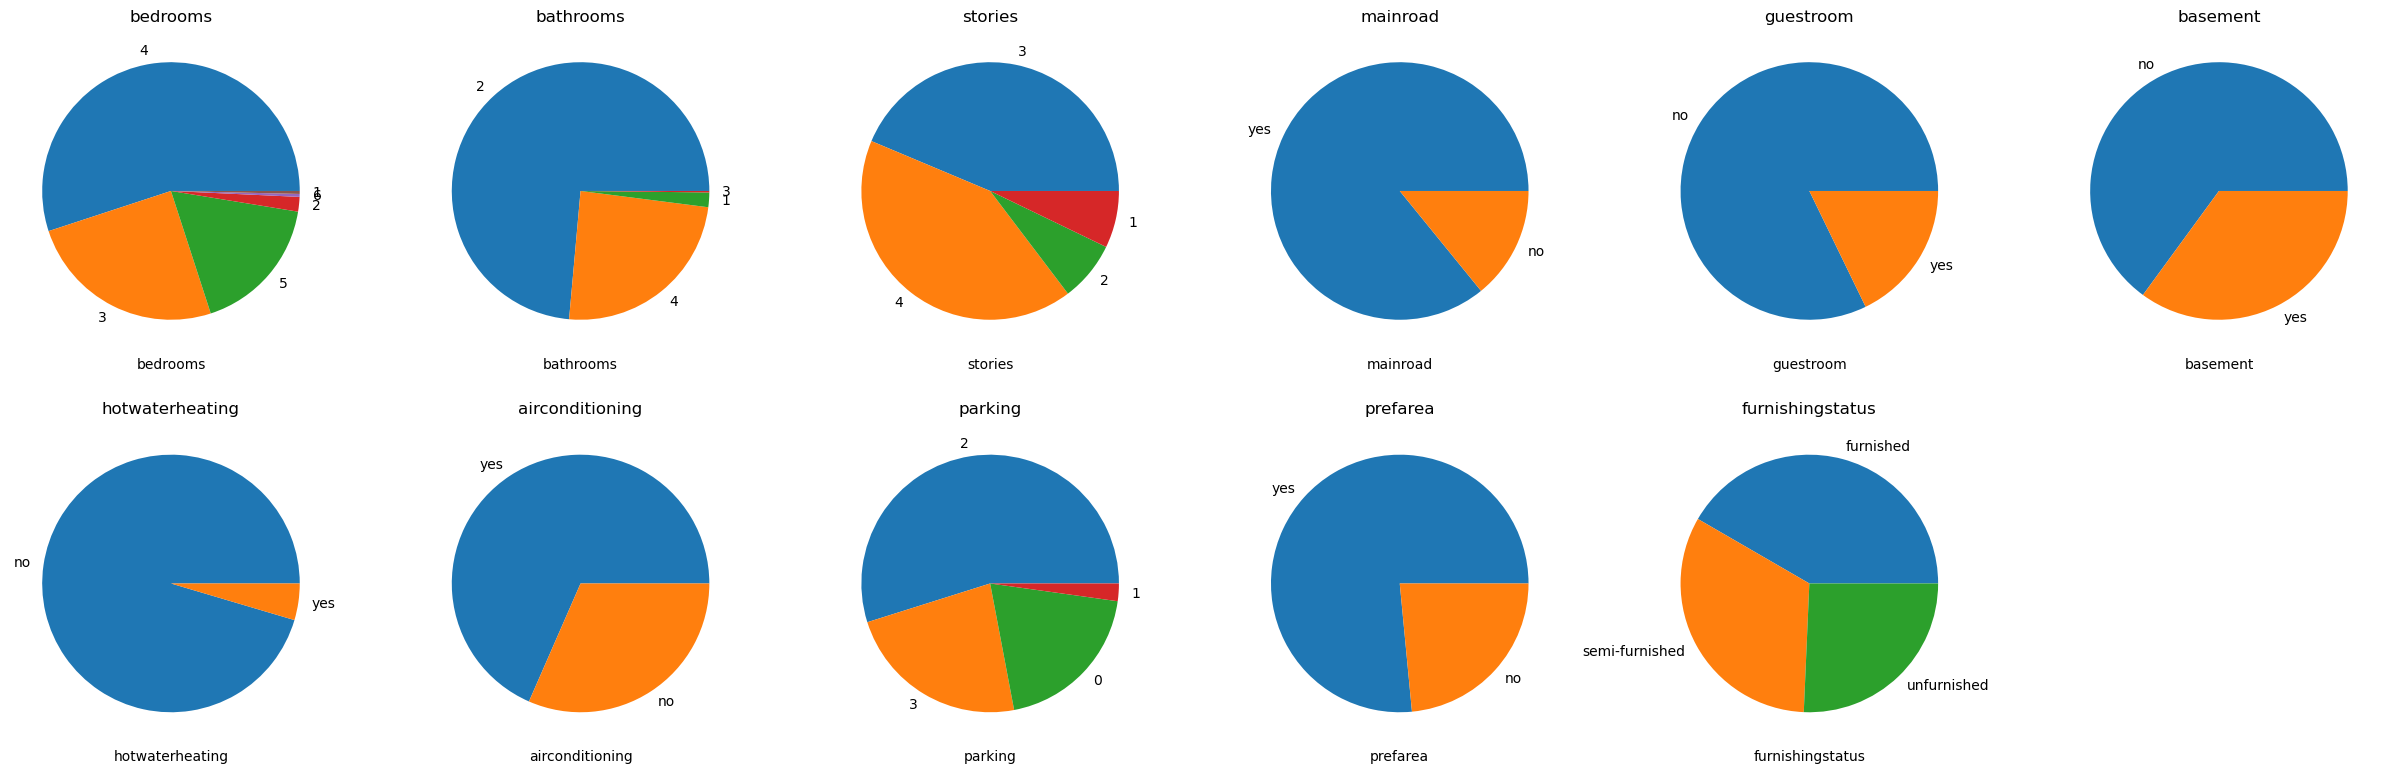

In [349]:
columns_to_plot = [col for col in hd.columns if col not in ['price', 'area']]
num_plots = len(columns_to_plot)

# Define number of plots per row
plots_per_row = 6
num_rows = math.ceil(num_plots / plots_per_row)

# Create subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(4 * plots_per_row, 4 * num_rows))

# Flatten axs array if there is more than one row
axs = axs.flatten()

# Plot each column in the respective subplot
for ax, col in zip(axs, columns_to_plot):
    ax.pie(hd[col].value_counts(), labels=hd[col].unique())
    ax.set_xlabel(col)
    ax.set_title(col)

# Hide any empty subplots
for i in range(num_plots, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

c:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


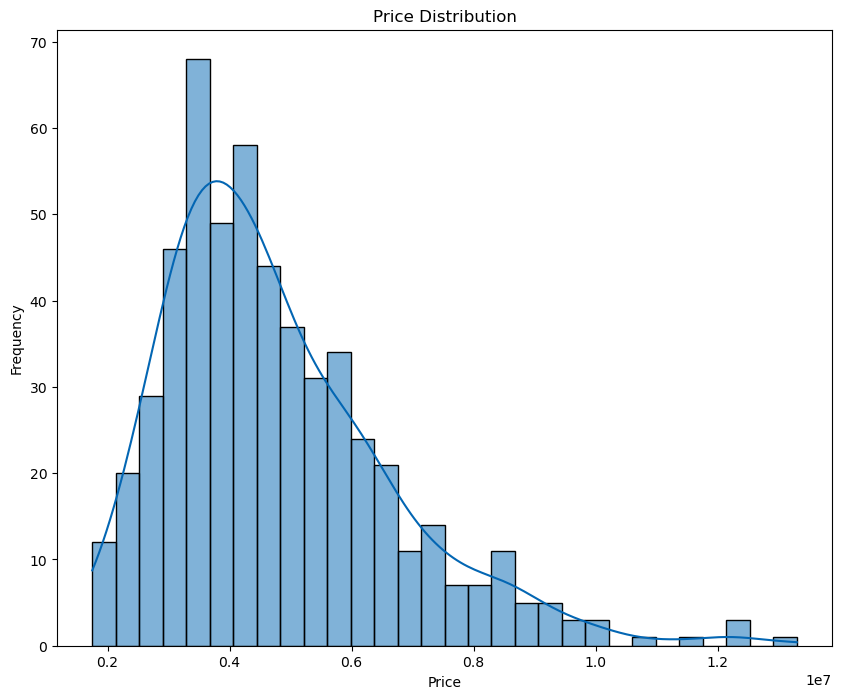

In [350]:
# distribution of the price
plt.figure(figsize=(10, 8))
sns.histplot(hd['price'], bins=30 , color=(0.01,0.4,0.7), kde=True ,edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



In [351]:
# changin other values which are not int or float to values that can be used
hd = pd.read_csv('Housing.csv')
# before changing the values to int or float
print(hd.head())

# Columns to be encoded
cols_to_encode = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

le = LabelEncoder()

for col in cols_to_encode:
    hd[col] = le.fit_transform(hd[col])
# after changing the values to int or float
print(hd.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4

In [352]:
# displaying the average price of the house with and without certain constriants variables in the data
# average price of the house with certain constraints
print("mainroad: ", hd[hd['mainroad'] == 1]['price'].mean())
print("without mainroad: ", hd[hd['mainroad'] == 0]['price'].mean())
print("guestroom: ", hd[hd['guestroom'] == 1]['price'].mean())
print("without guestroom: ", hd[hd['guestroom'] == 0]['price'].mean())
print("basement: ", hd[hd['basement'] == 1]['price'].mean())
print("without basement: ", hd[hd['basement'] == 0]['price'].mean())
print("hotwaterheating: ", hd[hd['hotwaterheating'] == 1]['price'].mean())
print("without hotwaterheating: ", hd[hd['hotwaterheating'] == 0]['price'].mean())
print("airconditioning: ", hd[hd['airconditioning'] == 1]['price'].mean())
print("without airconditioning: ", hd[hd['airconditioning'] == 0]['price'].mean())
print("prefarea: ", hd[hd['prefarea'] == 1]['price'].mean())
print("without prefarea: ", hd[hd['prefarea'] == 0]['price'].mean())
print("furnishingstatus: ", hd[hd['furnishingstatus'] == 1]['price'].mean())
print("without furnishingstatus: ", hd[hd['furnishingstatus'] == 0]['price'].mean())


mainroad:  4991777.329059829
without mainroad:  3398904.5454545454
guestroom:  5792896.907216495
without guestroom:  4544545.625
basement:  5242615.183246073
without basement:  4509965.93220339
hotwaterheating:  5559960.0
without hotwaterheating:  4728593.153846154
airconditioning:  6013220.5813953485
without airconditioning:  4191939.678284182
prefarea:  5879045.703125
without prefarea:  4425298.776978417
furnishingstatus:  4907524.22907489
without furnishingstatus:  5495696.0


In [353]:
# Creating variables for the model X for the dependent variable and y the other for the independent variables
# dropping columns that are not needed all the values which are changed to int or float are not affecting much to the price so they are dropped
X = hd.drop(['price', 'furnishingstatus', 'hotwaterheating' , 'guestroom' , 'prefarea' ,'mainroad' ,'basement','airconditioning'], axis=1)

y = hd['price']


In [354]:
# checking the shape of the data
X.shape

(545, 5)

In [355]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [356]:
# initializing the model
model = LinearRegression()

In [357]:
# training the model
model.fit(X_train, y_train)

LinearRegression()

In [358]:
# making predictions
predictions = model.predict(X_test)

In [359]:
# checking the accuracy of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
# r2_score
print('R2 Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 1127483.3523235186
Mean Squared Error: 2292721545725.3613
R2 Score: 0.5464062355495873


In [360]:
# Displaying predictions vs  actual values for  10 values from the test data
# with prections in integer
predictions = predictions.astype(int)
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(10)
print(df1)


      Actual  Predicted
316  4060000    6178627
77   6650000    6370140
360  3710000    3283148
90   6440000    4226007
493  2800000    3409685
209  4900000    4262158
176  5250000    5493440
249  4543000    5559897
516  2450000    3373715
426  3353000    3020513
